In [65]:
### Motor Imagery EEG Data Loading and Visualization

In [66]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import numpy as np

In [67]:
subject = 2  
runs = 10 

fnames = eegbci.load_data(subject, runs)
raw_list = [read_raw_edf(f, preload=True) for f in fnames]
raw = concatenate_raws(raw_list)


Extracting EDF parameters from /Users/light/Desktop/university/aml/datasets/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


In [68]:
mne.datasets.eegbci.standardize(raw)


In [69]:
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)


<RawEDF | S002R10.edf, 64 x 19680 (123.0 s), ~9.7 MiB, data loaded>

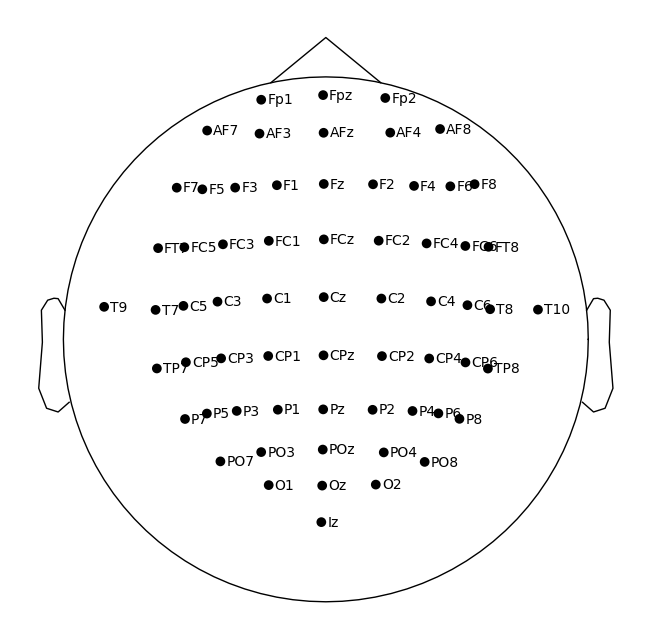

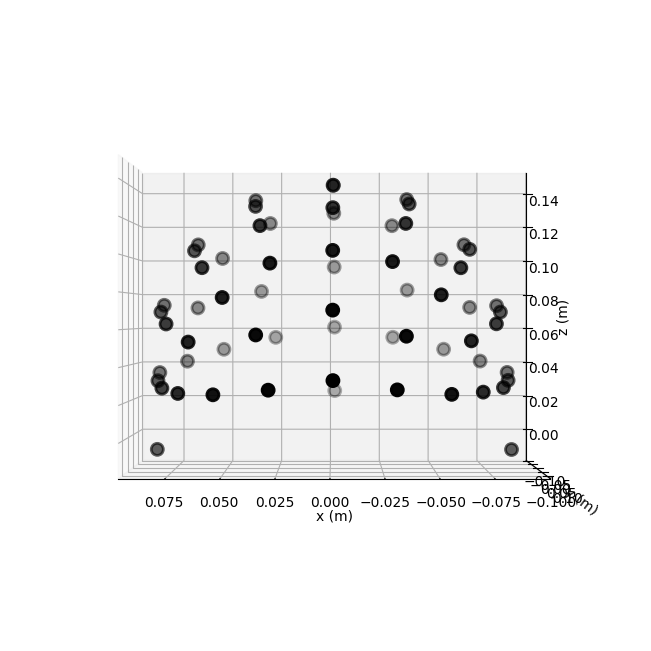

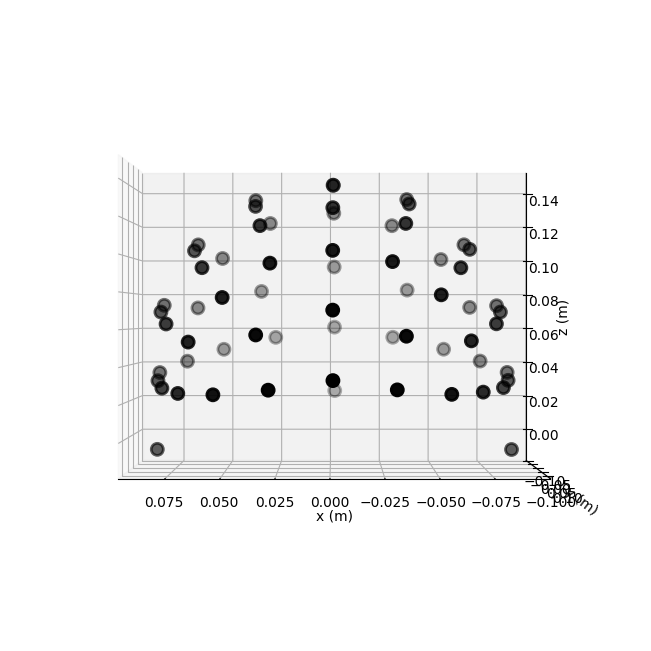

In [70]:
raw.plot_sensors(show_names=True, sphere=(0., 0., 0., 0.11))
raw.plot_sensors(kind='3d')          # 3D head


In [71]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)


Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}


In [72]:
raw.annotations.rename({
    "T1": "fists",
    "T2": "feet",
    "T0": "rest"
})


<Annotations | 30 segments: feet (7), fists (8), rest (15)>

In [73]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)

Used Annotations descriptions: [np.str_('feet'), np.str_('fists'), np.str_('rest')]
{np.str_('feet'): 1, np.str_('fists'): 2, np.str_('rest'): 3}


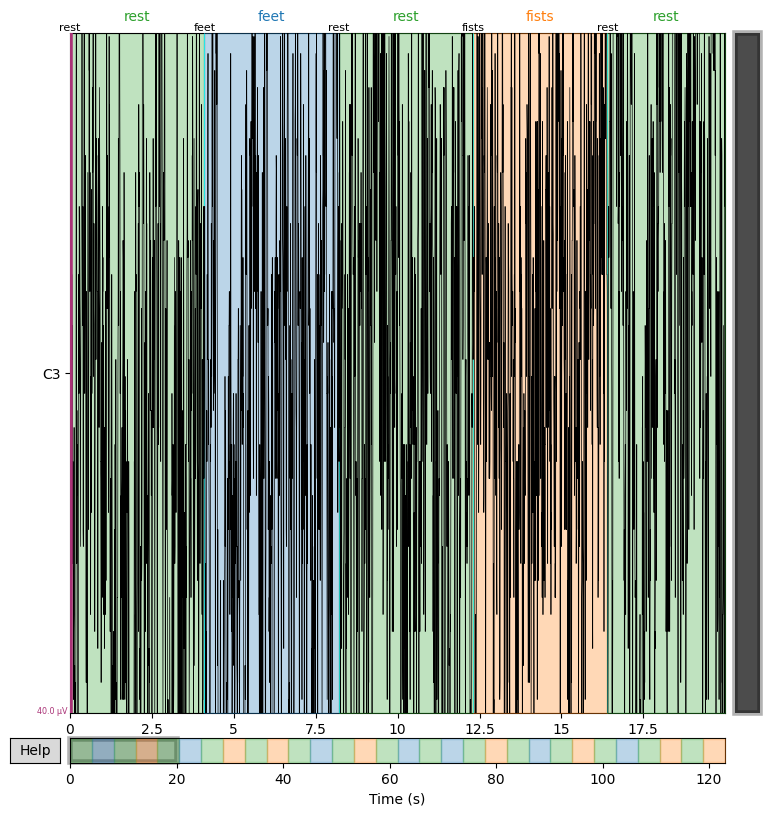

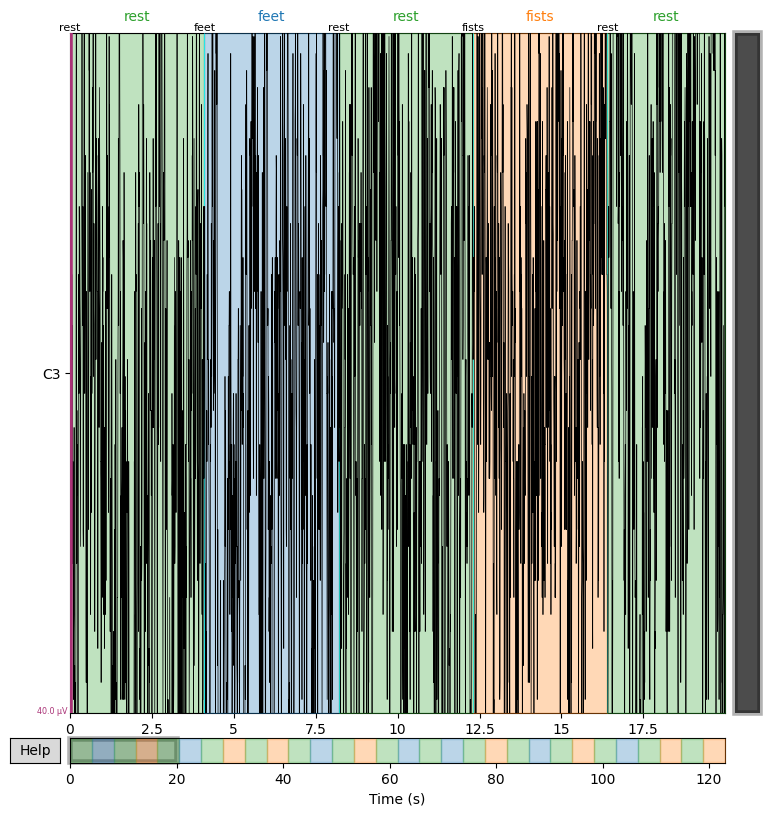

In [74]:
raw.plot(
    picks=['C3'],
    events=events,
    event_id=event_id,
    start=0,
    duration=20,
    show=False
)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


/Users/light/Desktop/university_work/aml/.aml/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


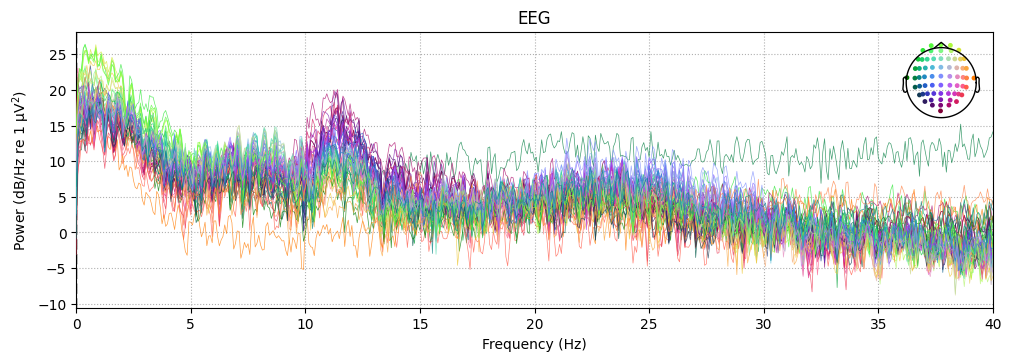

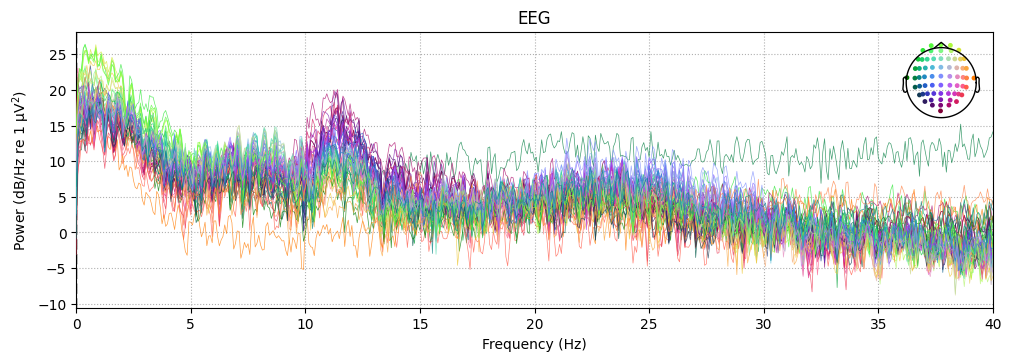

In [75]:
raw.plot_psd(fmax=40)

In [76]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)

Used Annotations descriptions: [np.str_('feet'), np.str_('fists'), np.str_('rest')]
{np.str_('feet'): 1, np.str_('fists'): 2, np.str_('rest'): 3}


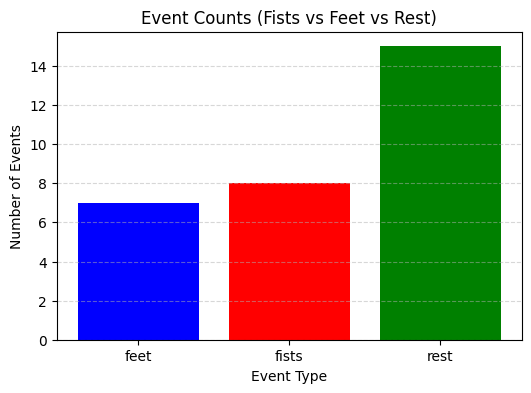

In [77]:
label_map = {v: k for k, v in event_id.items()}

unique, counts = np.unique(events[:, 2], return_counts=True)

labels = [label_map[u] for u in unique]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['blue', 'red', 'green'])
plt.title("Event Counts (Fists vs Feet vs Rest)")
plt.ylabel("Number of Events")
plt.xlabel("Event Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
